###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2022  by D. Koehn, T. Meier and J. Stampa, notebook style sheet by L.A. Barba, N.C. Clementi

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())

# Digitale Signalverarbeitung: Vorbereitende Datenbearbeitung

## Kapitel 2 Übungen

### Aufgabe 2.1 

Weisen Sie einer Floating Point Variablen $𝑥$ einen Wert $10^{20}$ zu. Definieren Sie
eine Variable $𝑦$ mit $𝑦 = 𝑥 + 1$. Berechnen Sie $𝑦 − 𝑥$ und interpretieren Sie das
Ergebnis.

In [2]:
# Importiere Python Bibliotheken 
# ------------------------------
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

In [116]:
# Define x
x = np.float64(1e20)

# Compute y
y = x + 1

# Compute and print y-x
print("y-x = ", y-x)

y-x =  0.0


### Aufgabe 2.2

Definieren Sie einen Vektor mit normalverteilten Zufallszahlen mit dem Mittelwert
0 und der Standardabweichung 1 und bestimmen Sie den Mittelwert und den
Median und schätzen Sie die Standardabweichung, den Standardfehler, die Schiefe
und die Kurtosis. Stellen Sie die Ergebnisse in Form einer Tabelle dar (Matlab:
table) und interpretieren Sie die Ergebnisse. Die Länge des Vektors soll folgende
Werte annehmen:

a) 10,

b) 100,

c) 10000.


### Aufgabe 2.3

Definieren Sie einen Vektor 𝐱 der Länge 5000, der normalverteilte Zufallszahlen
enthält. Stellen Sie den Vektor und ein Histogramm der auftretenden Werte graphisch
dar. Lassen Sie das Programm mehrmals laufen.

In [ ]:
def stats(N, repeat):

    # Define parameters
    mu = 0.     # average
    sigma = 1.  # standard derivation

    # Compute normal distributed random numbers
    x = np.random.normal(mu, sigma, N)

    # Compute mean
    x_mean = np.sum(x) / N
   
    # Compute median
    x_median = np.median(x)
    
    # Compute standard deviation
    alpha_2 = np.sum((x-x_mean)**2) / (N-1)
    x_std = np.sqrt(alpha_2)
    
    # Compute standard error
    x_error = x_std / np.sqrt(N)
    
    # Compute skewness    
    alpha_3 = np.sum((x-x_mean)**3) / (N-1)
    S = alpha_3 / alpha_2**(3./2.)
    
    # Compute kurtosis
    alpha_4 = np.sum((x-x_mean)**4) / (N-1)
    K = alpha_4 / alpha_2**(2.)
    
    # Compute optimum bin number using Freedman–Diaconis rule
    q25, q75 = np.percentile(x, [25, 75])
    bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
    bins = round((x.max() - x.min()) / bin_width)
    
    # Plot histogram
    plt.hist(x, bins=bins)
    plt.ylabel('counts')
    plt.xlabel('x bin')
    plt.xlim(-4, 4)
    
    # Print mean, median, std, std error, skew, kurtosis 
    print("mean = ", x_mean)
    print("median = ", x_median)
    print("std = ", x_std)
    print("std_error = ", x_error)
    print("Skew = ", S)
    print("Kurtosis = ", K)
    
    plt.show()

In [ ]:
interactive_plot = interactive(stats, N=(10, 10000, 10), repeat=False)
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

### Aufgabe 2.4

Modifizeren Sie die Zufallszahlen nach der Vorschrift $sgn(𝑥_i)|𝑥_𝑖|^\gamma$ und stellen Sie den Vektor und ein Histogramm der auftretenden Werte graphisch dar. Schätzen Sie die Kurtosis. Interpretieren Sie die Ergebnisse. $\gamma$ soll die folgenden Werte annehmen:

a) 1.6,

b) 0.4.

In [ ]:
def stats_mod(N, gamma, repeat):

    # Define parameters
    mu = 0.     # average
    sigma = 1.  # standard derivation

    # Compute normal distributed random numbers
    x = np.random.normal(mu, sigma, N)
    x = np.sign(x)*abs(x)**gamma
    
    # Compute mean
    x_mean = np.sum(x) / N
   
    # Compute median
    x_median = np.median(x)
    
    # Compute standard deviation
    alpha_2 = np.sum((x-x_mean)**2) / (N-1)
    x_std = np.sqrt(alpha_2)
    
    # Compute standard error
    x_error = x_std / np.sqrt(N)
    
    # Compute skewness    
    alpha_3 = np.sum((x-x_mean)**3) / (N-1)
    S = alpha_3 / alpha_2**(3./2.)
    
    # Compute kurtosis
    alpha_4 = np.sum((x-x_mean)**4) / (N-1)
    K = alpha_4 / alpha_2**(2.)
    
    # Compute optimum bin number using Freedman–Diaconis rule
    q25, q75 = np.percentile(x, [25, 75])
    bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
    bins = round((x.max() - x.min()) / bin_width)
    
    # Plot histogram
    plt.hist(x, bins=bins)
    plt.ylabel('counts')
    plt.xlabel('x bin')
    plt.xlim(-4, 4)
    
    # Print mean, median, std, std error, skew, kurtosis 
    print("mean = ", x_mean)
    print("median = ", x_median)
    print("std = ", x_std)
    print("std_error = ", x_error)
    print("Skew = ", S)
    print("Kurtosis = ", K)
    
    plt.show()

In [ ]:
interactive_plot = interactive(stats_mod, N=(10, 10000, 10), gamma=(0.,2.0,0.2), repeat=False)
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

### Aufgabe 2.5

Definieren Sie eine Matrix, die normalverteilte Zufallszahlen enthalten soll. Die
Dimension der Matrix soll (10×500) sein und 10 Realisierungen für einen diskreten
Zufallsprozess mit 500 Samples enthalten. Stellen Sie das Ergebnis graphisch
dar. Berechnen Sie die Zeit- und Ensemblemittelwerte und stellen Sie sie graphisch
dar.

In [83]:
def time_ensemble_average(N, NT):

    # Define parameters
    mu = 0.     # average
    sigma = 1.  # standard derivation

    # Compute normal distributed random numbers in a N x NT matrix
    x = np.random.normal(mu, sigma, [N,NT])
    
    # Compute time-mean
    x_mean_time = np.sum(x,1) / N
    
    # Compute ensemble-mean
    x_mean_ens = np.sum(x,0) / N
    
    # Plot random matrix
    plt.figure(figsize=(9,5))
    plt.pcolormesh(x)
    plt.ylabel('Realization no.')
    plt.xlabel('Time Sample')
    plt.title('Random Matrix')
    
    # Plot time average
    plt.figure(figsize=(9,2))
    plt.plot(x_mean_time,'o-')
    plt.ylabel('Amplitude')
    plt.xlabel('Realization no.')
    plt.title('Time Average')
    
    # Plot time average
    plt.figure(figsize=(9,2))
    plt.plot(x_mean_ens,'o-')
    plt.ylabel('Amplitude')
    plt.xlabel('Ensemble no.')
    plt.title('Ensemble Average')
    
    plt.show()

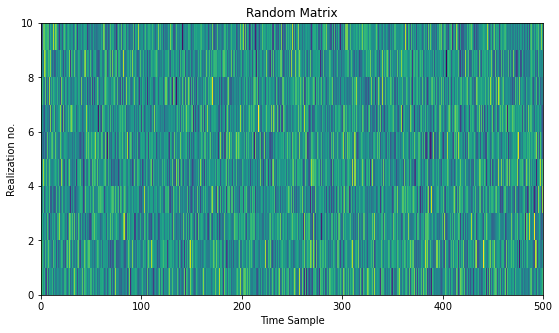

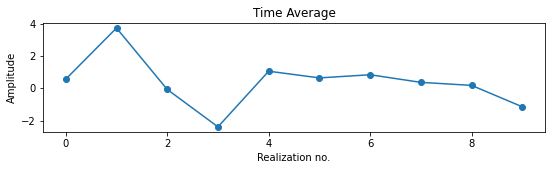

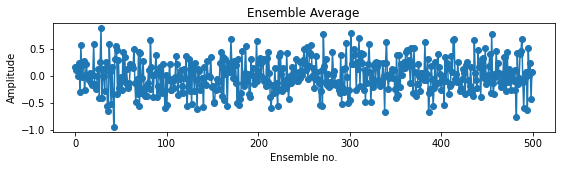

In [84]:
time_ensemble_average(10,500)

### Aufgabe 2.6

Definieren Sie zwei Vektoren 𝐱 und 𝐲, die normalverteilte Zufallszahlen enthalten
und die Länge 1000 haben sollen. Stellen Sie das Ergebnis in Form eines zweidimensionalen
(bivarianten) Histogramms dar.

In [119]:
def bivariant_hist(N):

    # Define parameters
    mu = 0.     # average
    sigma = 1.  # standard derivation

    # Compute normal distributed random numbers in vector x
    x = np.random.normal(mu, sigma, N)
    
    # Compute normal distributed random numbers in vector y
    y = np.random.normal(mu, sigma, N)
    
    # Compute optimum bin number using Freedman–Diaconis rule
    q25, q75 = np.percentile(x, [25, 75])
    bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
    bins = round((x.max() - x.min()) / bin_width)
    
    # Plot bivariant histogram
    plt.figure(figsize=(7,7))
    plt.hist2d(x,y, bins=bins)
    plt.ylabel('x bin')
    plt.xlabel('y bin')
    plt.title('Bivariant Histogram')
    
    plt.show()

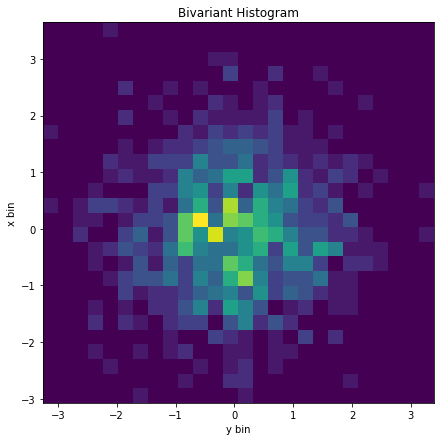

In [120]:
bivariant_hist(1000)